
📊 Model A - Original Data
MAE : 177.2
RMSE: 218.47
R²  : 0.87

📊 Model B - Supervised Binned Data
MAE : 169.41
RMSE: 207.82
R²  : 0.85


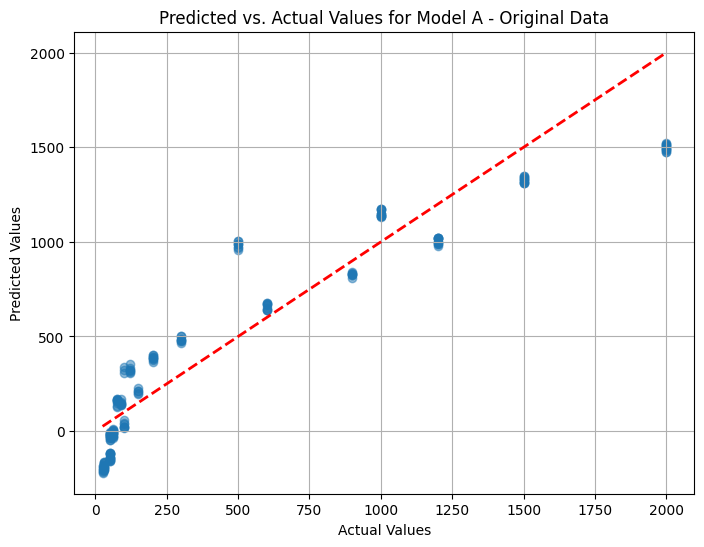

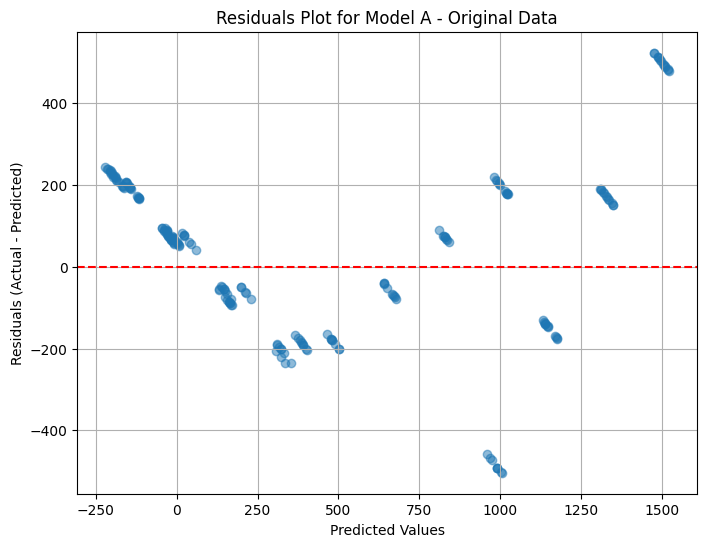

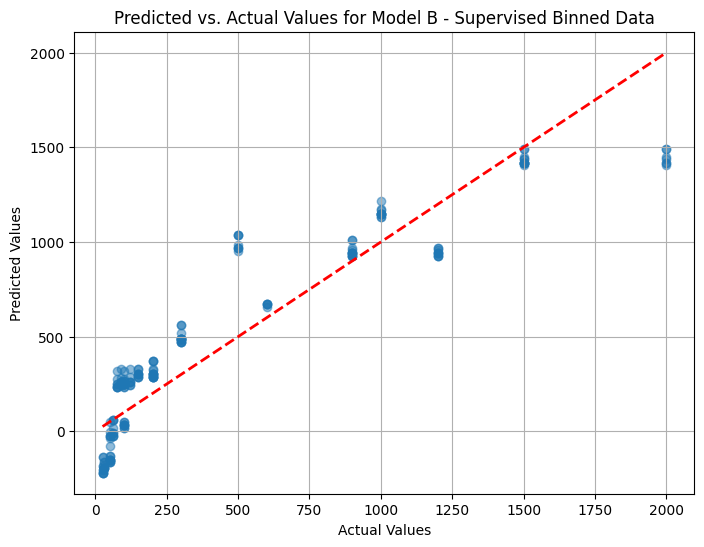

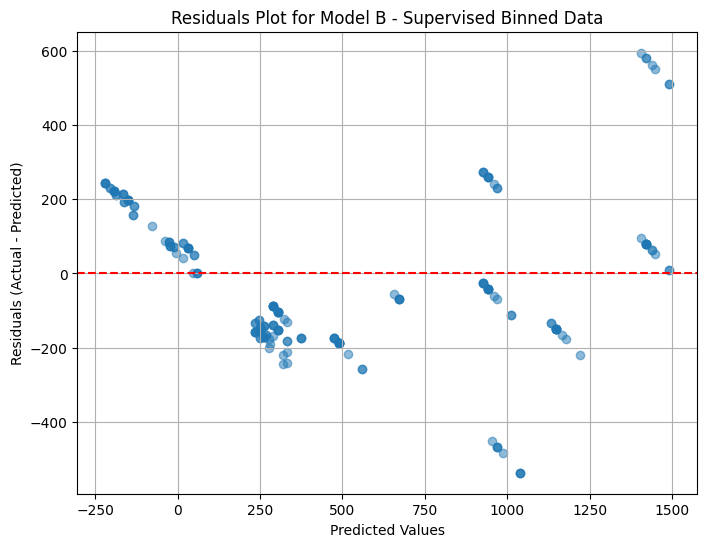

['../data/results/model_binned_supervised.joblib']

In [ ]:
# 1. Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt

# 2. Load original (non-binned) data
original_df =  pd.read_csv("../data/processed/original_features.csv")

# 3. Load supervised-binned data
binned_df = pd.read_csv("../data/processed/binned_data.csv")

# 4. Target column
target = "Total Amount"

### ----------------------------- MODEL A: Original Data ----------------------------- ###
# Features: numeric continuous
features_a = ['Price per Unit', 'Age', 'Quantity']
X_a = original_df[features_a]
y_a = original_df[target]

X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_a, y_a, test_size=0.2, random_state=42)

model_a = LinearRegression()
model_a.fit(X_a_train, y_a_train)
y_a_pred = model_a.predict(X_a_test)

### ----------------------------- MODEL B: Supervised Binned Data ----------------------------- ###
# Features: supervised-binned categorical
features_b = ['Price_Bin_Supervised', 'Age_Bin_Supervised', 'Quantity_Bin_Supervised']
X_b = binned_df[features_b]
y_b = binned_df[target]

# Train-test split
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, test_size=0.2, random_state=42)

# Encode categorical features
categorical_features = ['Price_Bin_Supervised', 'Age_Bin_Supervised', 'Quantity_Bin_Supervised']
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
])

# Pipeline for Model B
model_b = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model_b.fit(X_b_train, y_b_train)
y_b_pred = model_b.predict(X_b_test)

### ----------------------------- Evaluation ----------------------------- ###


def evaluate(y_true, y_pred, label):
    """
    Evaluates a model's performance and prints key metrics.
    """
    print(f"\n📊 {label}")
    print("MAE :", round(mean_absolute_error(y_true, y_pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))
    print("R²  :", round(r2_score(y_true, y_pred), 2))

# Evaluate both models
evaluate(y_a_test, y_a_pred, "Model A - Original Data")
evaluate(y_b_test, y_b_pred, "Model B - Supervised Binned Data")

### ----------------------------- Visualization ----------------------------- ###
def plot_predictions_vs_actuals(y_true, y_pred, label):
    """
    Generates a scatter plot of predicted values against actual values.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    # Plot the ideal prediction line
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(f'Predicted vs. Actual Values for {label}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

def plot_residuals(y_true, y_pred, label):
    """
    Generates a scatter plot of residuals (errors) against predicted values.
    """
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    # Plot the zero error line
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residuals Plot for {label}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.grid(True)
    plt.show()

# Generate and show plots for both models
plot_predictions_vs_actuals(y_a_test, y_a_pred, "Model A - Original Data")
plot_residuals(y_a_test, y_a_pred, "Model A - Original Data")

plot_predictions_vs_actuals(y_b_test, y_b_pred, "Model B - Supervised Binned Data")
plot_residuals(y_b_test, y_b_pred, "Model B - Supervised Binned Data")


### ----------------------------- Save Models ----------------------------- ###
joblib.dump(model_a, "../data/results/model_original.joblib")
joblib.dump(model_b, "../data/results/model_binned_supervised.joblib")
